# Tom's Diner: Kompression von Audiodaten

Demonstration der Unterschiede in der Audioqualität durch Kompression am Beispiel von Suzanne Vegas Tom's Diner.

Ausgehend von der unkomprimierten Wav-Datei wurden komprimierte MP3-Versionen erstellt:
```
ffmpeg -i toms-diner-wav.wav -b:a 128k toms-diner-128.mp3
ffmpeg -i toms-diner-wav.wav -b:a 320k toms-diner-320.mp3
```

* Dateigröße wav: 3,7 MB
* Dateigröße mp3-128k: 332 kB
* Dateigröße mp3-320k: 830 kB

Quelle: [npr: How Well Can You Hear Audio Quality?](https://www.npr.org/sections/therecord/2015/06/02/411473508/how-well-can-you-hear-audio-quality)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.io.wavfile

import audioread
import soundfile
from IPython.display import Audio
import librosa.display

%config InlineBackend.figure_format = 'retina'

In [6]:
def print_spectrogram(data, title):
    
    f, t, spectrogram = scipy.signal.spectrogram(data, samplerate)
    
    fig = plt.figure(figsize=(10,6))
    
    #  only use a dynamic range of 25 dB
    v_min = np.max(spectrogram)-25
    
    np.seterr(divide = 'ignore')
    plt.pcolormesh(t, f, np.log(spectrogram), vmin=v_min, shading='auto', cmap='jet')
    plt.colorbar()

    plt.ylabel('Frequenz [Hz]')
    plt.xlabel('Zeit [sec]')
    plt.title(title)
    
    np.seterr(divide = 'warn')
    #plt.savefig('test.png', dpi=300)

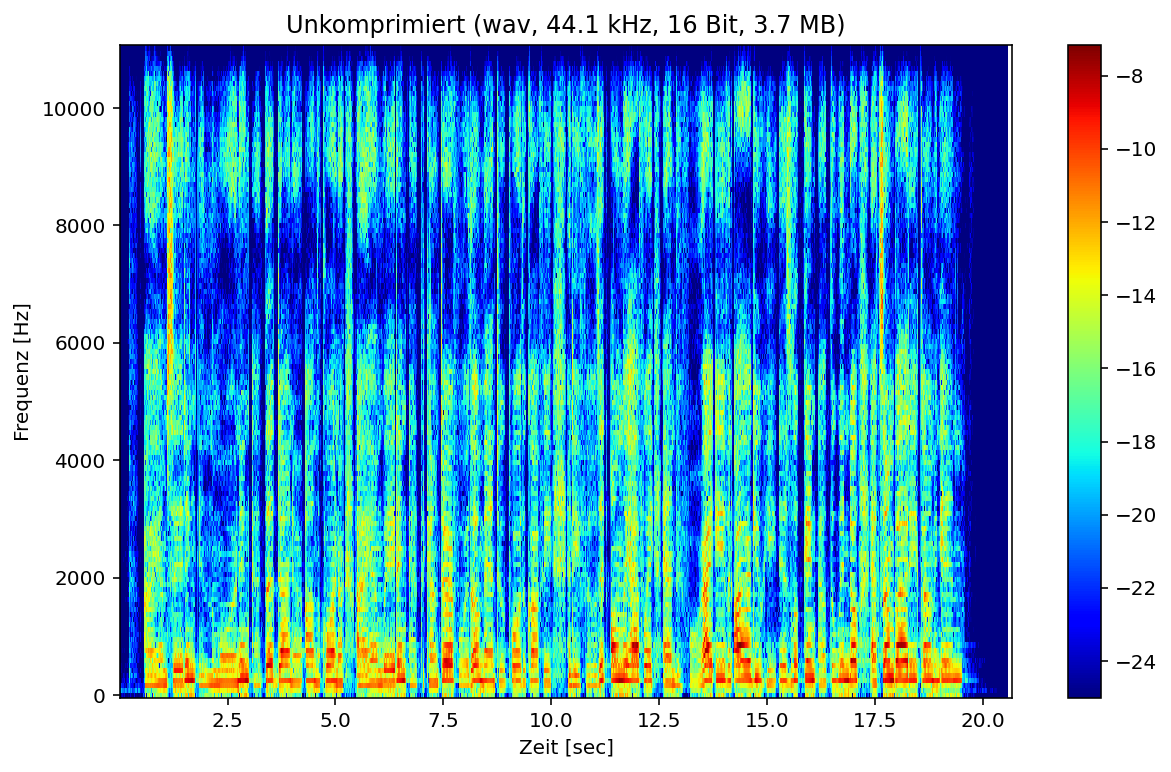

In [8]:
data_wav, samplerate = librosa.load('./toms-diner-wav.wav')

print_spectrogram(data_wav, 'Unkomprimiert (wav, 44.1 kHz, 16 Bit, 3.7 MB)')
Audio(data_wav, rate=samplerate)

/usr/local/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


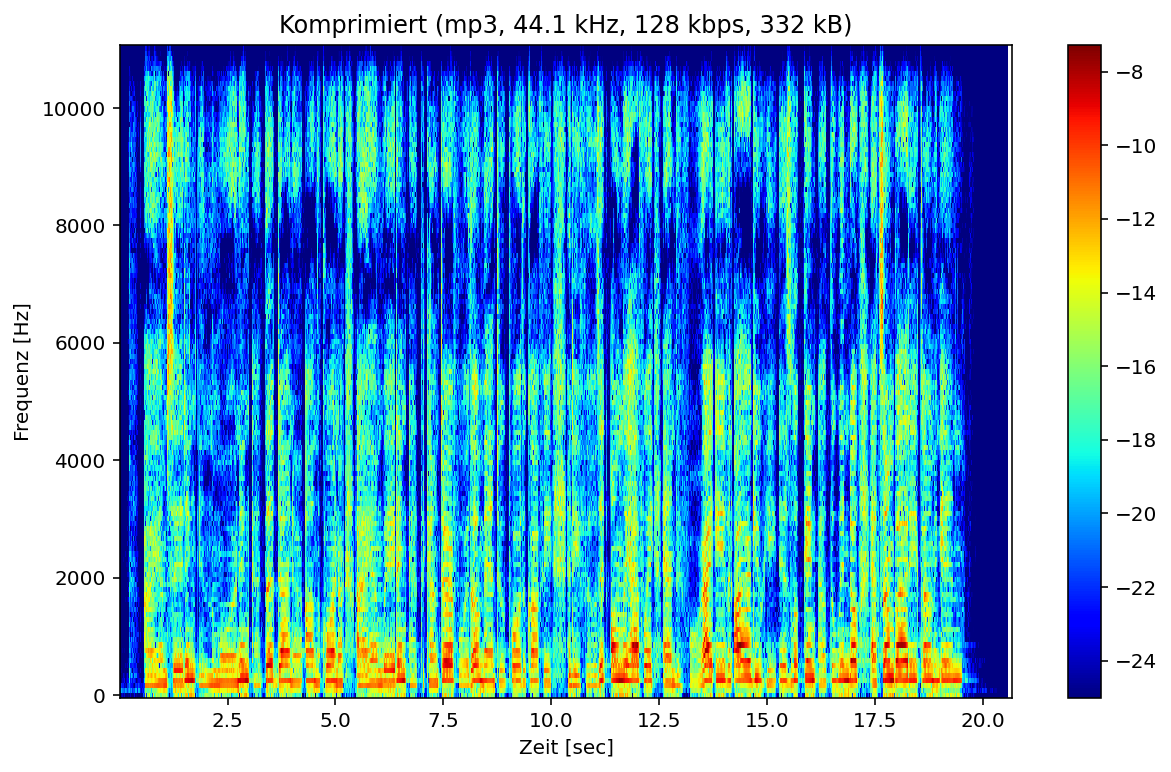

In [10]:
data_128, samplerate = librosa.load('./toms-diner-128.mp3')

print_spectrogram(data_128, 'Komprimiert (mp3, 44.1 kHz, 128 kbps, 332 kB)')
Audio(data_128, rate=samplerate)